In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\crime.csv")
data

,Date,Latitude,Longitude,Magnitude
0,2017-02-06T20:11:14.000Z,38.894376,-76.997556,4
1,2017-06-03T12:54:27.000Z,38.906838,-77.058661,6
2,2017-04-07T00:00:00.000Z,38.960739,-77.018034,16
3,2017-05-31T11:39:56.000Z,38.905151,-77.063998,4
4,2017-07-30T00:00:00.000Z,38.949532,-77.020246,16
...,...,...,...,...
33111,2017-12-23T17:15:25.000Z,38.918640,-77.031953,4
33112,2017-12-30T06:13:28.000Z,38.927417,-77.021727,6
33113,2017-12-30T16:07:46.000Z,38.919739,-77.033395,4
33114,2017-12-30T22:06:45.000Z,38.937766,-76.974186,4


In [13]:
np.random.seed(42)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
class KMeans():
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self._is_converged(centroids_old, self.centroids):
                break
            if self.plot_steps:
                self.plot()
        return self._get_cluster_labels(self.clusters)
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        plt.show()
    def cent(self):
        return self.centroids

In [4]:
data.Magnitude.unique()

array(['4', '6', '16', '12', '8', '10', '2', 'ARSON', '14'], dtype=object)

Text(0, 0.5, 'Longitude')

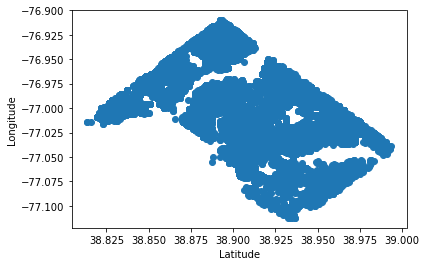

In [5]:
plt.scatter(data.Latitude,data.Longitude)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [6]:
data.isna().sum()

Date         0
Latitude     0
Longitude    0
Magnitude    0
dtype: int64

In [7]:
X = data[['Latitude', 'Longitude']]
X = np.array(X)

In [8]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go

<ipython-input-9-1d17fcec1927>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes= plt.axes()


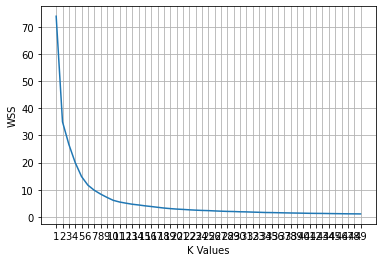

In [9]:
wss = []
K = []
k_rng = range(1,50)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    wss.append(km.inertia_)
    K.append(k)
plt.xlabel('K Values')
plt.ylabel('WSS')
axes= plt.axes()
axes.set_xticks(K)
plt.grid()
plt.plot(k_rng,wss)

In [14]:
arr = data.Magnitude.unique()
arr = np.delete(arr, 7)
arr = arr.astype(int)
avg = np.average(arr)
avg

9.0

In [15]:
data.Magnitude = data.Magnitude.replace(to_replace ="ARSON",value ="9")
data.Magnitude.unique()

array(['4', '6', '16', '12', '8', '10', '2', '9', '14'], dtype=object)

In [16]:
data['Magnitude'] = data['Magnitude'].astype(int)
data.Magnitude.unique()

array([ 4,  6, 16, 12,  8, 10,  2,  9, 14])

In [17]:
X = data[['Latitude', 'Longitude', 'Magnitude']]
X = np.array(X)
X

array([[ 38.89437604, -76.99755622,   4.        ],
       [ 38.90683791, -77.05866107,   6.        ],
       [ 38.96073891, -77.01803392,  16.        ],
       ...,
       [ 38.9197388 , -77.03339489,   4.        ],
       [ 38.93776635, -76.97418624,   4.        ],
       [ 38.95142333, -77.02381136,   6.        ]])

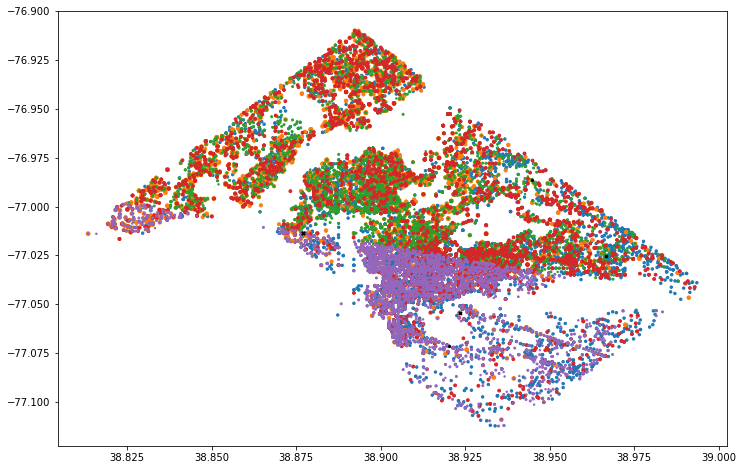

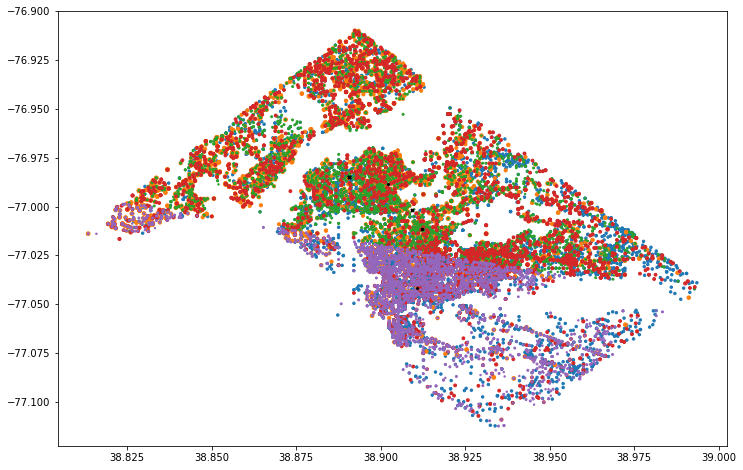

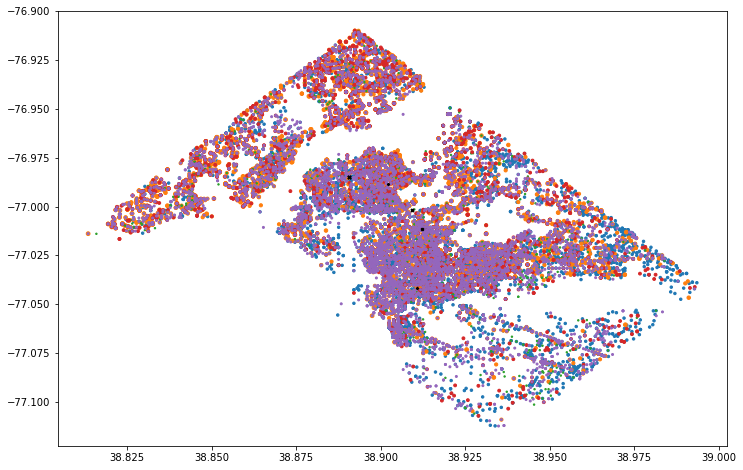

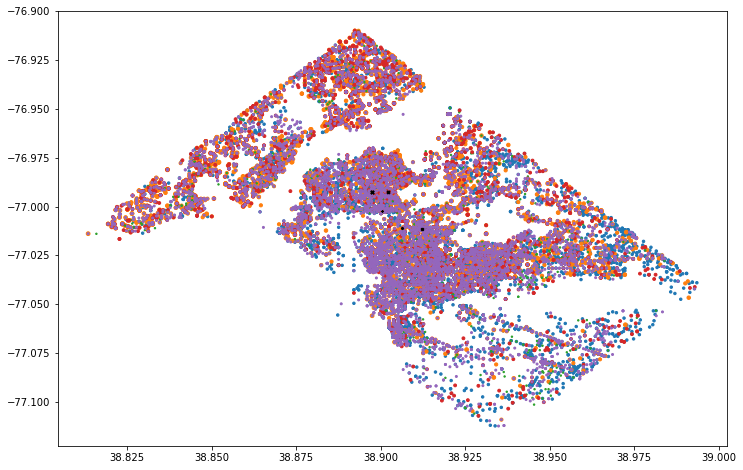

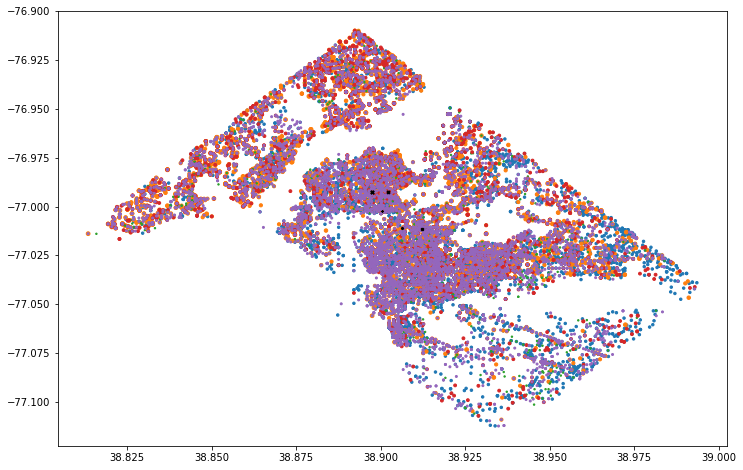

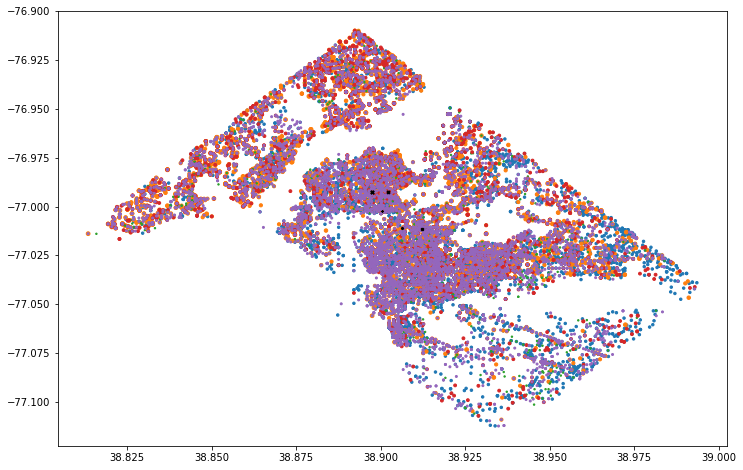

In [19]:
k = KMeans(K=5, max_iters=150, plot_steps=True)
y_pred = k.predict(X)
k.plot()